In [9]:
import pandas as pd

import os
import pandas as pd

# Pfad zum Ordner mit den CSV-Dateien
folder_path = 'evaluation_data'

# Leere Liste zum Speichern der DataFrames
df_list = []

# Durchlaufe alle Dateien im Ordner
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Lade die CSV-Datei in ein DataFrame
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extrahiere den ersten String im Dateinamen vor dem ersten '_'
        topology_type = filename.split('_')[0]
        
        # Füge die Spalte 'topology_type' hinzu
        df['topology_type'] = topology_type
        
        # Füge das DataFrame der Liste hinzu
        df_list.append(df)

# Verbinde alle DataFrames zu einem großen DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv("All_Data.csv")
# Zeige das Ergebnis an
combined_df.head(5)



,Unnamed: 0,network_size,tau,algorithm,adjustment_cost,routing_cost,total_cost,alpha,window_size,sliding_offset,request_counter,requests_per_adjustment,topology_type,zipf
0,0,500,0.1,splaynet,8237670,1183361,9421031,NaN,NaN,NaN,NaN,NaN,frequency,NaN
1,1,500,0.1,lazy,1124352,1183361,2307713,128.0,NaN,NaN,"[13, 11, 12, 11, 11, 11, 13, 16, 15, 11, 12, 1...",11.383039,frequency,NaN
2,2,500,0.1,sliding,1130752,1190369,2321121,128.0,32.0,32.0,"[13, 11, 11, 11, 10, 10, 12, 17, 16, 10, 13, 1...",11.318619,frequency,NaN
3,3,500,0.1,sliding_no_reset,1132928,1193094,2326022,128.0,32.0,32.0,"[13, 11, 11, 11, 10, 10, 12, 18, 15, 10, 12, 1...",11.296882,frequency,NaN
4,4,500,0.1,sliding,1133440,1193075,2326515,128.0,64.0,64.0,"[13, 11, 11, 11, 10, 10, 12, 17, 18, 11, 11, 1...",11.291780,frequency,NaN


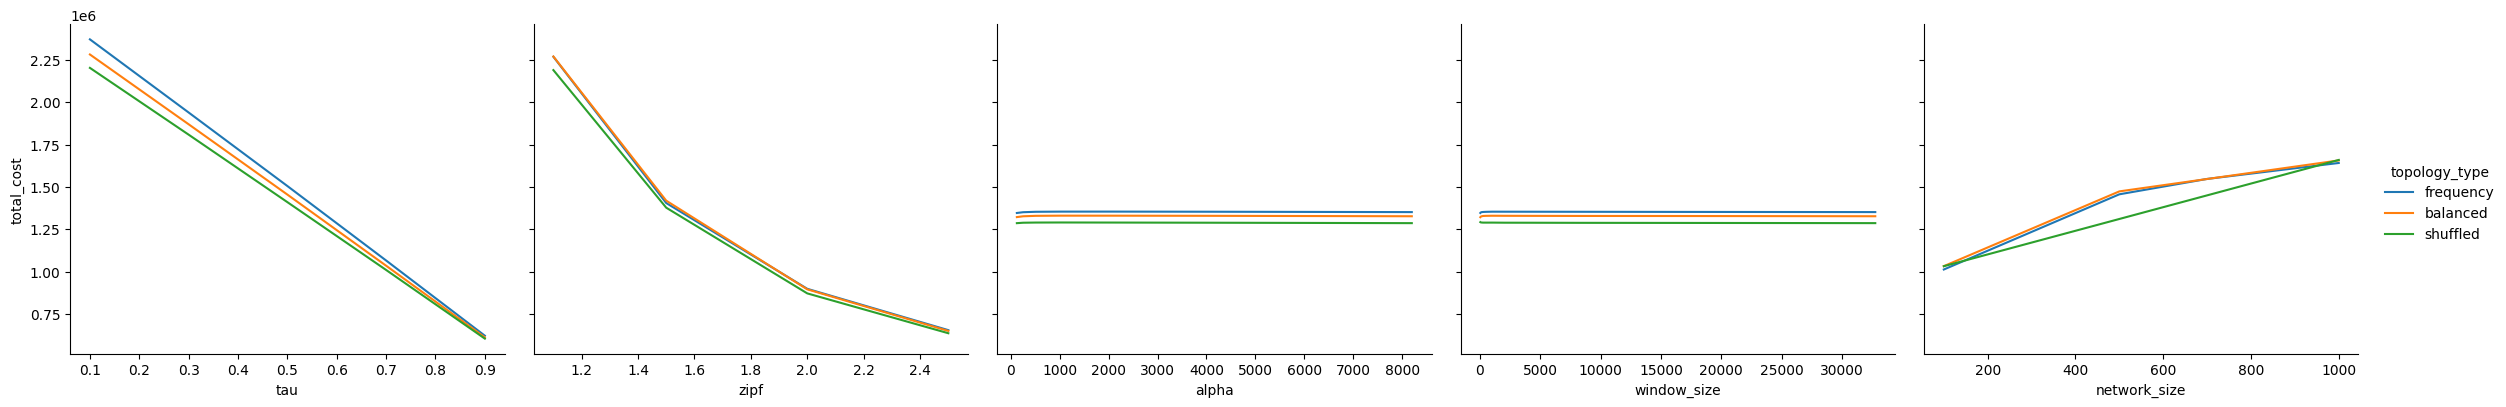

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Liste der X-Achsen-Variablen
x_vars = ['tau', 'zipf', 'alpha', 'window_size', 'network_size']

# Liste der Y-Achsen-Variablen
y_vars = ['total_cost']

# Erstelle einen Grid Plot für jede Kombination von x- und y-Achsen-Variablen
for y in y_vars:
    g = sns.PairGrid(combined_df, y_vars=[y], x_vars=x_vars, hue='topology_type', height=4, aspect=1.2)
    g.map(sns.lineplot, errorbar=None)
    g.add_legend()
    plt.show()



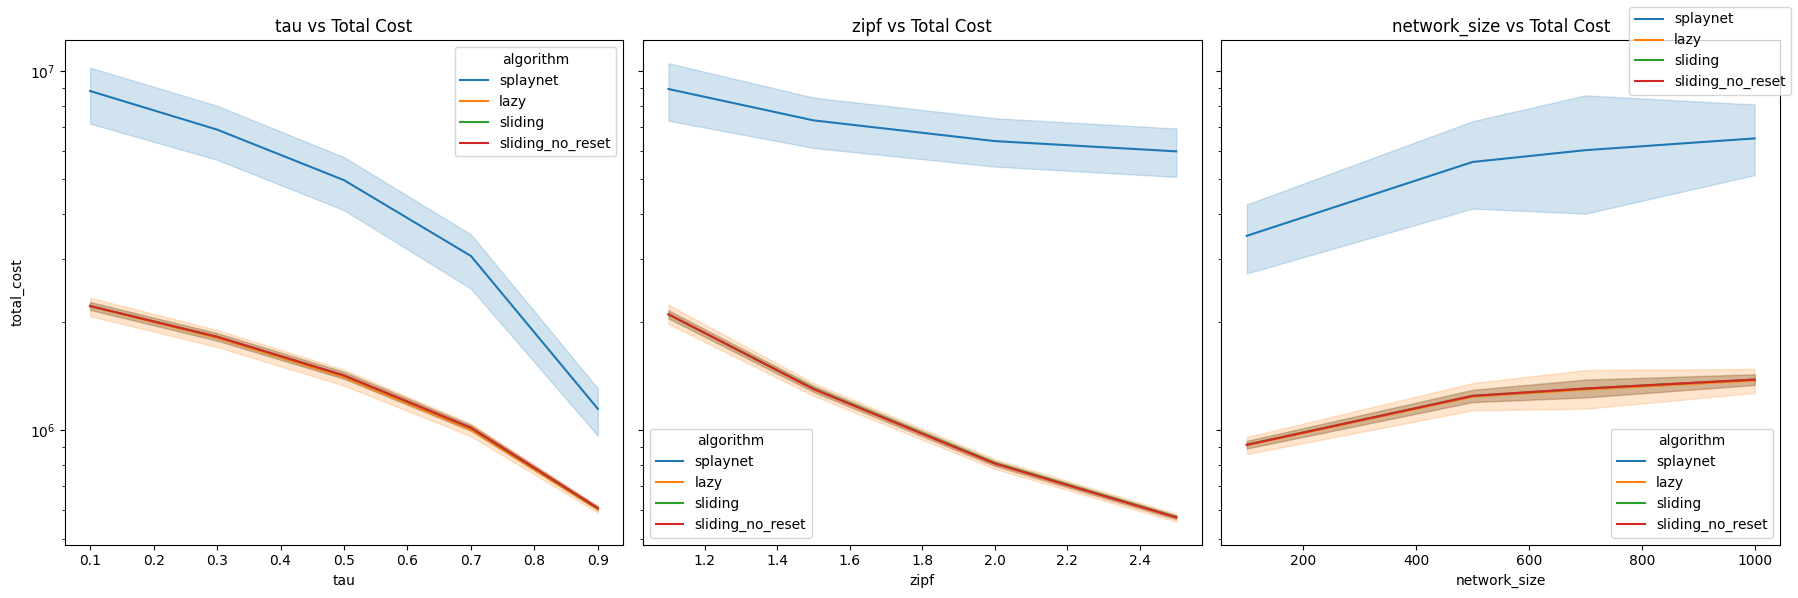

In [16]:
# Liste der X-Achsen-Variablen
x_vars = ['tau', 'zipf', 'network_size']

# Erstelle den Grid Plot mit 3 Graphen in einer Reihe
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, x_var in zip(axes, x_vars):
    sns.lineplot(data=combined_df, x=x_var, y='total_cost', hue='algorithm', ax=ax )# errorbar=None)
    ax.set_title(f'{x_var} vs Total Cost')
    ax.set_yscale('log')

# Legende hinzufügen
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Plot anzeigen
plt.tight_layout()
plt.show()

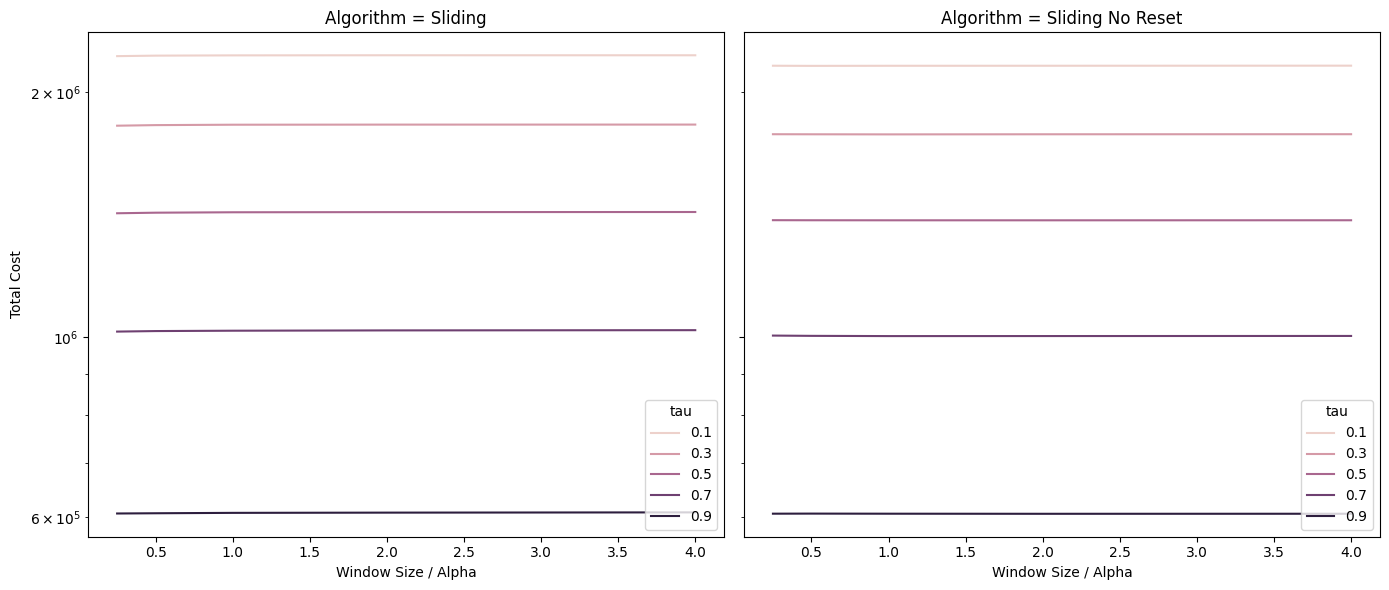

In [27]:


# Berechne eine neue Spalte für window_size / alpha
combined_df['window_size_alpha'] = combined_df['window_size'] / combined_df['alpha']

# Erstelle den Grid Plot mit 2 Graphen nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Daten für den Algorithmus 'sliding'
sliding_df = combined_df[combined_df['algorithm'] == 'sliding']
sns.lineplot(data=sliding_df, x='window_size_alpha', y='total_cost', hue='tau', ax=axes[0], errorbar=None)
axes[0].set_title('Algorithm = Sliding')
axes[0].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Daten für den Algorithmus 'sliding_no_reset'
sliding_no_reset_df = combined_df[combined_df['algorithm'] == 'sliding_no_reset']
sns.lineplot(data=sliding_no_reset_df, x='window_size_alpha', y='total_cost', hue='tau', ax=axes[1], errorbar=None)
axes[1].set_title('Algorithm = Sliding No Reset')
#axes[1].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Gemeinsame Y-Achse Beschriftung
axes[0].set_ylabel('Total Cost')
axes[1].set_ylabel('')

# Gemeinsame X-Achse Beschriftung
for ax in axes:
    ax.set_xlabel('Window Size / Alpha')

# Plot anzeigen
plt.tight_layout()
plt.show()


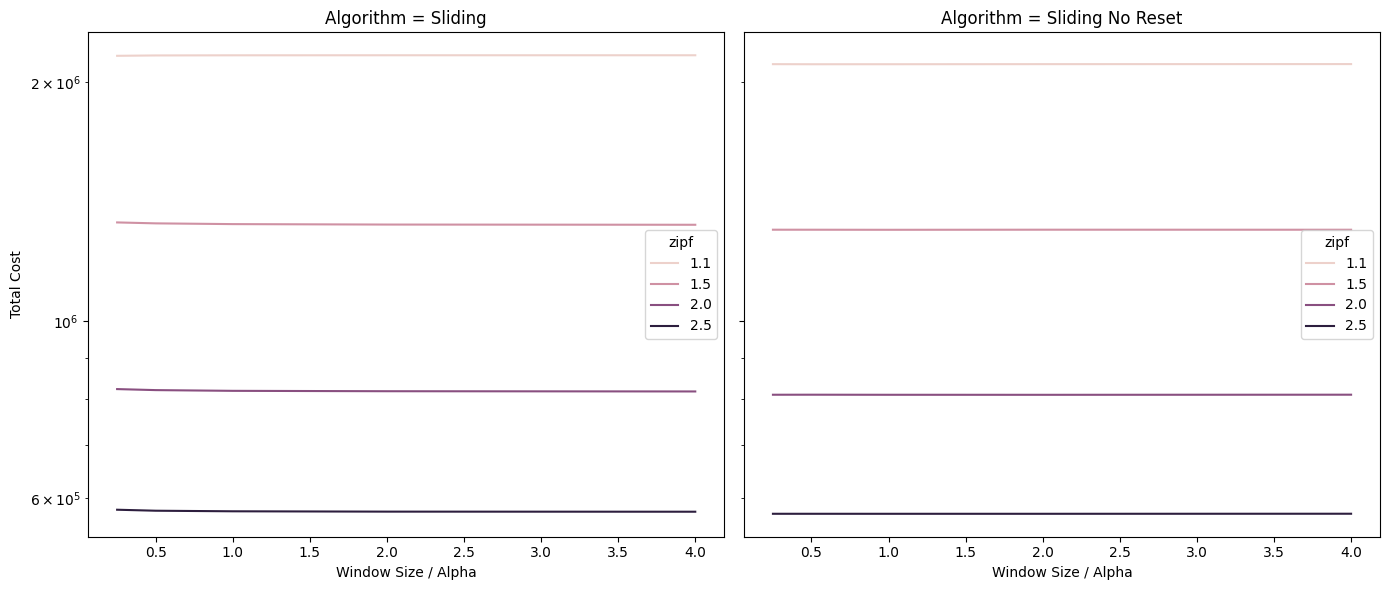

In [20]:
# Berechne eine neue Spalte für window_size / alpha
combined_df['window_size_alpha'] = combined_df['window_size'] / combined_df['alpha']

# Erstelle den Grid Plot mit 2 Graphen nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Daten für den Algorithmus 'sliding'
sliding_df = combined_df[combined_df['algorithm'] == 'sliding']
sns.lineplot(data=sliding_df, x='window_size_alpha', y='total_cost', hue='zipf', ax=axes[0], errorbar=None)
axes[0].set_title('Algorithm = Sliding')
axes[0].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Daten für den Algorithmus 'sliding_no_reset'
sliding_no_reset_df = combined_df[combined_df['algorithm'] == 'sliding_no_reset']
sns.lineplot(data=sliding_no_reset_df, x='window_size_alpha', y='total_cost', hue='zipf', ax=axes[1], errorbar=None)
axes[1].set_title('Algorithm = Sliding No Reset')
axes[1].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Gemeinsame Y-Achse Beschriftung
axes[0].set_ylabel('Total Cost')
axes[1].set_ylabel('')

# Gemeinsame X-Achse Beschriftung
for ax in axes:
    ax.set_xlabel('Window Size / Alpha')

# Plot anzeigen
plt.tight_layout()
plt.show()

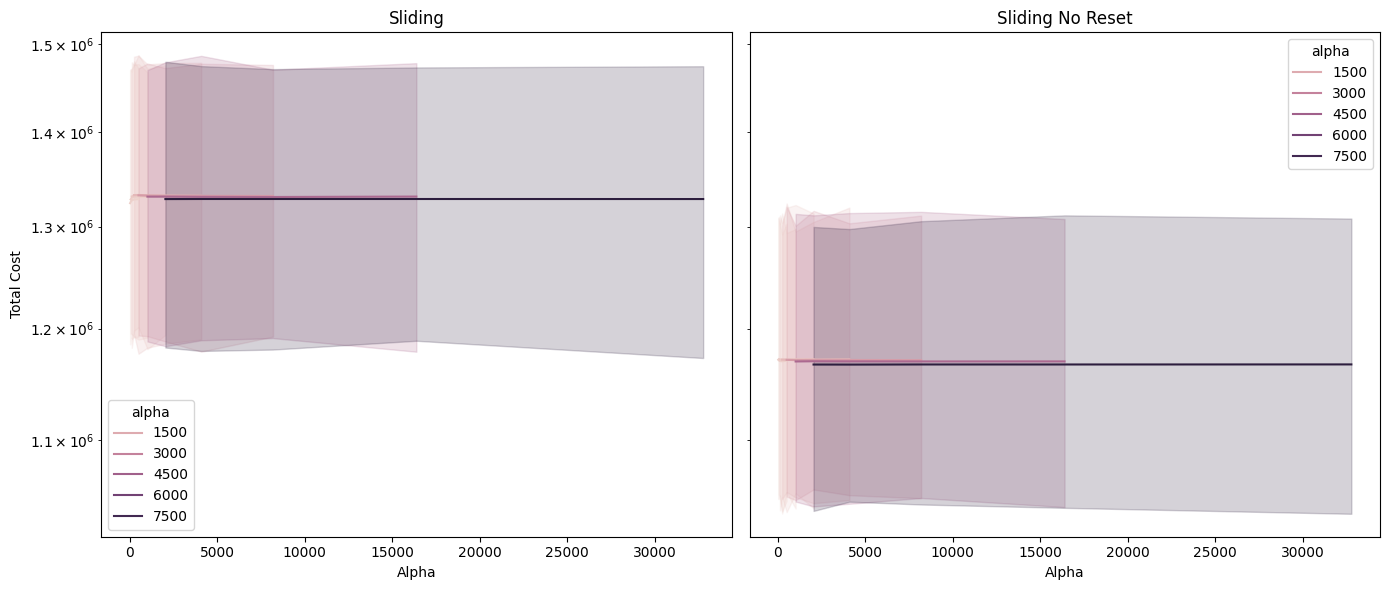

In [29]:

# Erstelle den Grid Plot mit 2 Graphen nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Daten für den Algorithmus 'sliding'
sliding_df = combined_df[combined_df['algorithm'] == 'sliding']
sns.lineplot(data=sliding_df, x='window_size', y='total_cost', hue='alpha', ax=axes[0], errorbar=None)
axes[0].set_title('Sliding')
axes[0].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Daten für den Algorithmus 'sliding_no_reset'
sliding_no_reset_df = combined_df[combined_df['algorithm'] == 'sliding_no_reset']
sns.lineplot(data=sliding_no_reset_df, x='window_size', y='total_cost', hue='alpha', ax=axes[1], errorbar=None )
axes[1].set_title('Sliding No Reset')
axes[1].set_yscale('log')  # Setze die Y-Achse auf logarithmische Skala

# Gemeinsame Y-Achse Beschriftung
axes[0].set_ylabel('Total Cost')
axes[1].set_ylabel('')

# Gemeinsame X-Achse Beschriftung
for ax in axes:
    ax.set_xlabel('Alpha')

# Legende nur einmal anzeigen
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')

# Plot anzeigen
plt.tight_layout()
plt.show()


/var/folders/q1/n0k96z6x2jbb8qb3sn9t_1_m0000gn/T/ipykernel_29710/1363935881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['alpha_window_size'] = filtered_df['alpha'] / filtered_df['window_size']


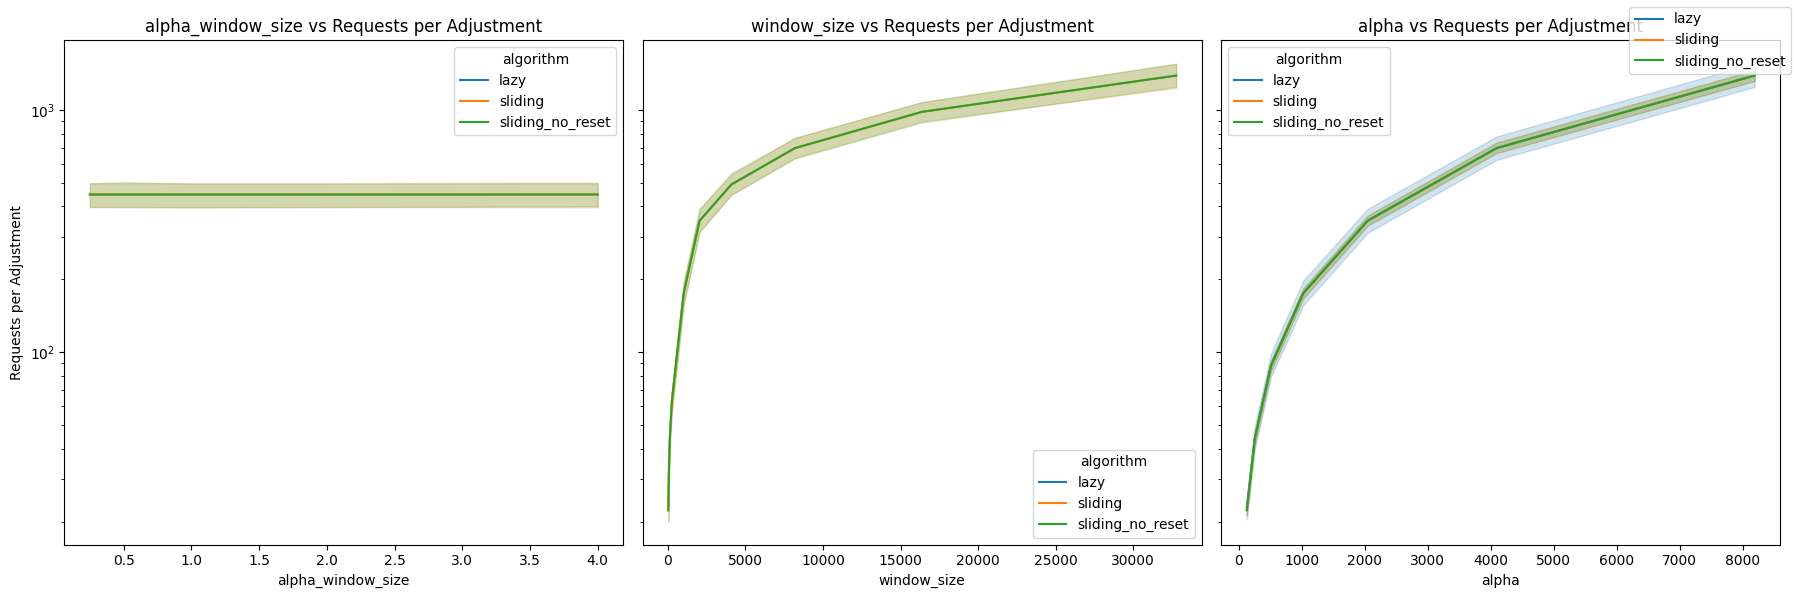

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtere den Algorithmus 'splaynet' aus
filtered_df = combined_df[combined_df['algorithm'] != 'splaynet']

# Berechne die neue Spalte für alpha/window_size
filtered_df['alpha_window_size'] = filtered_df['alpha'] / filtered_df['window_size']

# Liste der X-Achsen-Variablen
x_vars = ['alpha_window_size', 'window_size', 'alpha']

# Erstelle den Grid Plot mit 3 Graphen nebeneinander
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, x_var in zip(axes, x_vars):
    sns.lineplot(data=filtered_df, x=x_var, y='requests_per_adjustment', hue='algorithm', ax=ax)
    ax.set_title(f'{x_var} vs Requests per Adjustment')
    ax.set_yscale('log')  # Optional: Setze die Y-Achse auf logarithmische Skala

# Gemeinsame Y-Achse Beschriftung
axes[0].set_ylabel('Requests per Adjustment')
for ax in axes[1:]:
    ax.set_ylabel('')

# Gemeinsame X-Achse Beschriftung
for ax in axes:
    ax.set_xlabel(ax.get_title().split()[0])  # Beschriftung basierend auf dem Titel

# Legende nur einmal anzeigen
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Plot anzeigen
plt.tight_layout()
plt.show()
